In [86]:
import torch
import pylab as plt
import torch
import numpy as np
import pywt
import ptwt  # use "from src import ptwt" for a cloned the repo
from tqdm.auto import tqdm

In [109]:
def haar_wavedec2(x):
    wavelet = pywt.Wavelet('haar')
    level = int(np.log2(x.shape[-1]))
    trans = ptwt.wavedec2(x, wavelet, mode='zero', level=level)
    out = torch.empty_like(x)
    for level, comp in enumerate(trans):
        if level == 0:
            out[..., :1, :1] = comp
        else:
            out[..., 2**(level-1):2**level, :2**(level-1)] = comp[0]
            out[..., :2**(level-1), 2**(level-1):2**level] = comp[1]
            out[..., 2**(level-1):2**level, 2**(level-1):2**level] = comp[2]
    return out

def haar_waverec2(x):
    wavelet = pywt.Wavelet('haar')
    coeff = []
    level = int(np.log2(x[0].shape[-1]))+1
    for level in range(level):
        if level == 0:
            coeff.append(x[..., :1, :1])
        else:
            coeff.append((
                x[..., 2**(level-1):2**level, :2**(level-1)],
                x[..., :2**(level-1), 2**(level-1):2**level],
                x[..., 2**(level-1):2**level, 2**(level-1):2**level]
            ))
    rec = ptwt.waverec2(coeff, wavelet)
    return rec

In [88]:
import powerbox
pb = powerbox.PowerBox(128, lambda k: 1/(k+1)**3)

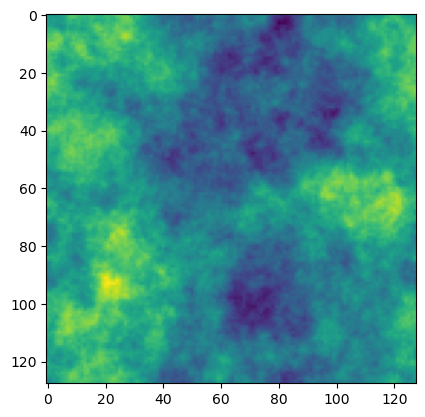

In [89]:
x = pb.delta_x()
plt.imshow(x)
x = torch.tensor(x).unsqueeze(0)

In [116]:
x = torch.linspace(-1, 1, 128)
X, Y = torch.meshgrid(x, x)
x = 1/((X**2 + Y**2)*10+1).unsqueeze(0)
#x = torch.randn(64, 256, 256).cuda()

In [117]:
for _ in tqdm(range(1000)):
    out = haar_wavedec2(x)
    rec = haar_waverec2(out)

  0%|          | 0/1000 [00:00<?, ?it/s]

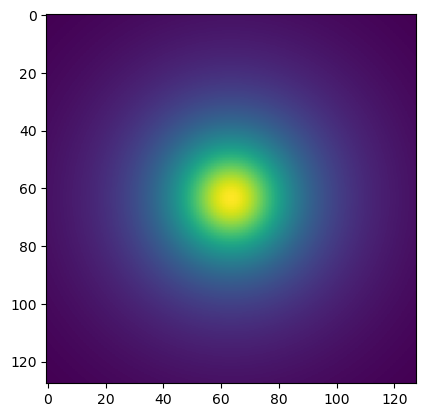

In [118]:
plt.imshow(rec[0].cpu())
#plt.colorbar()

In [ ]:
#plt.hist(out[0].flatten().numpy(), bins = 100);